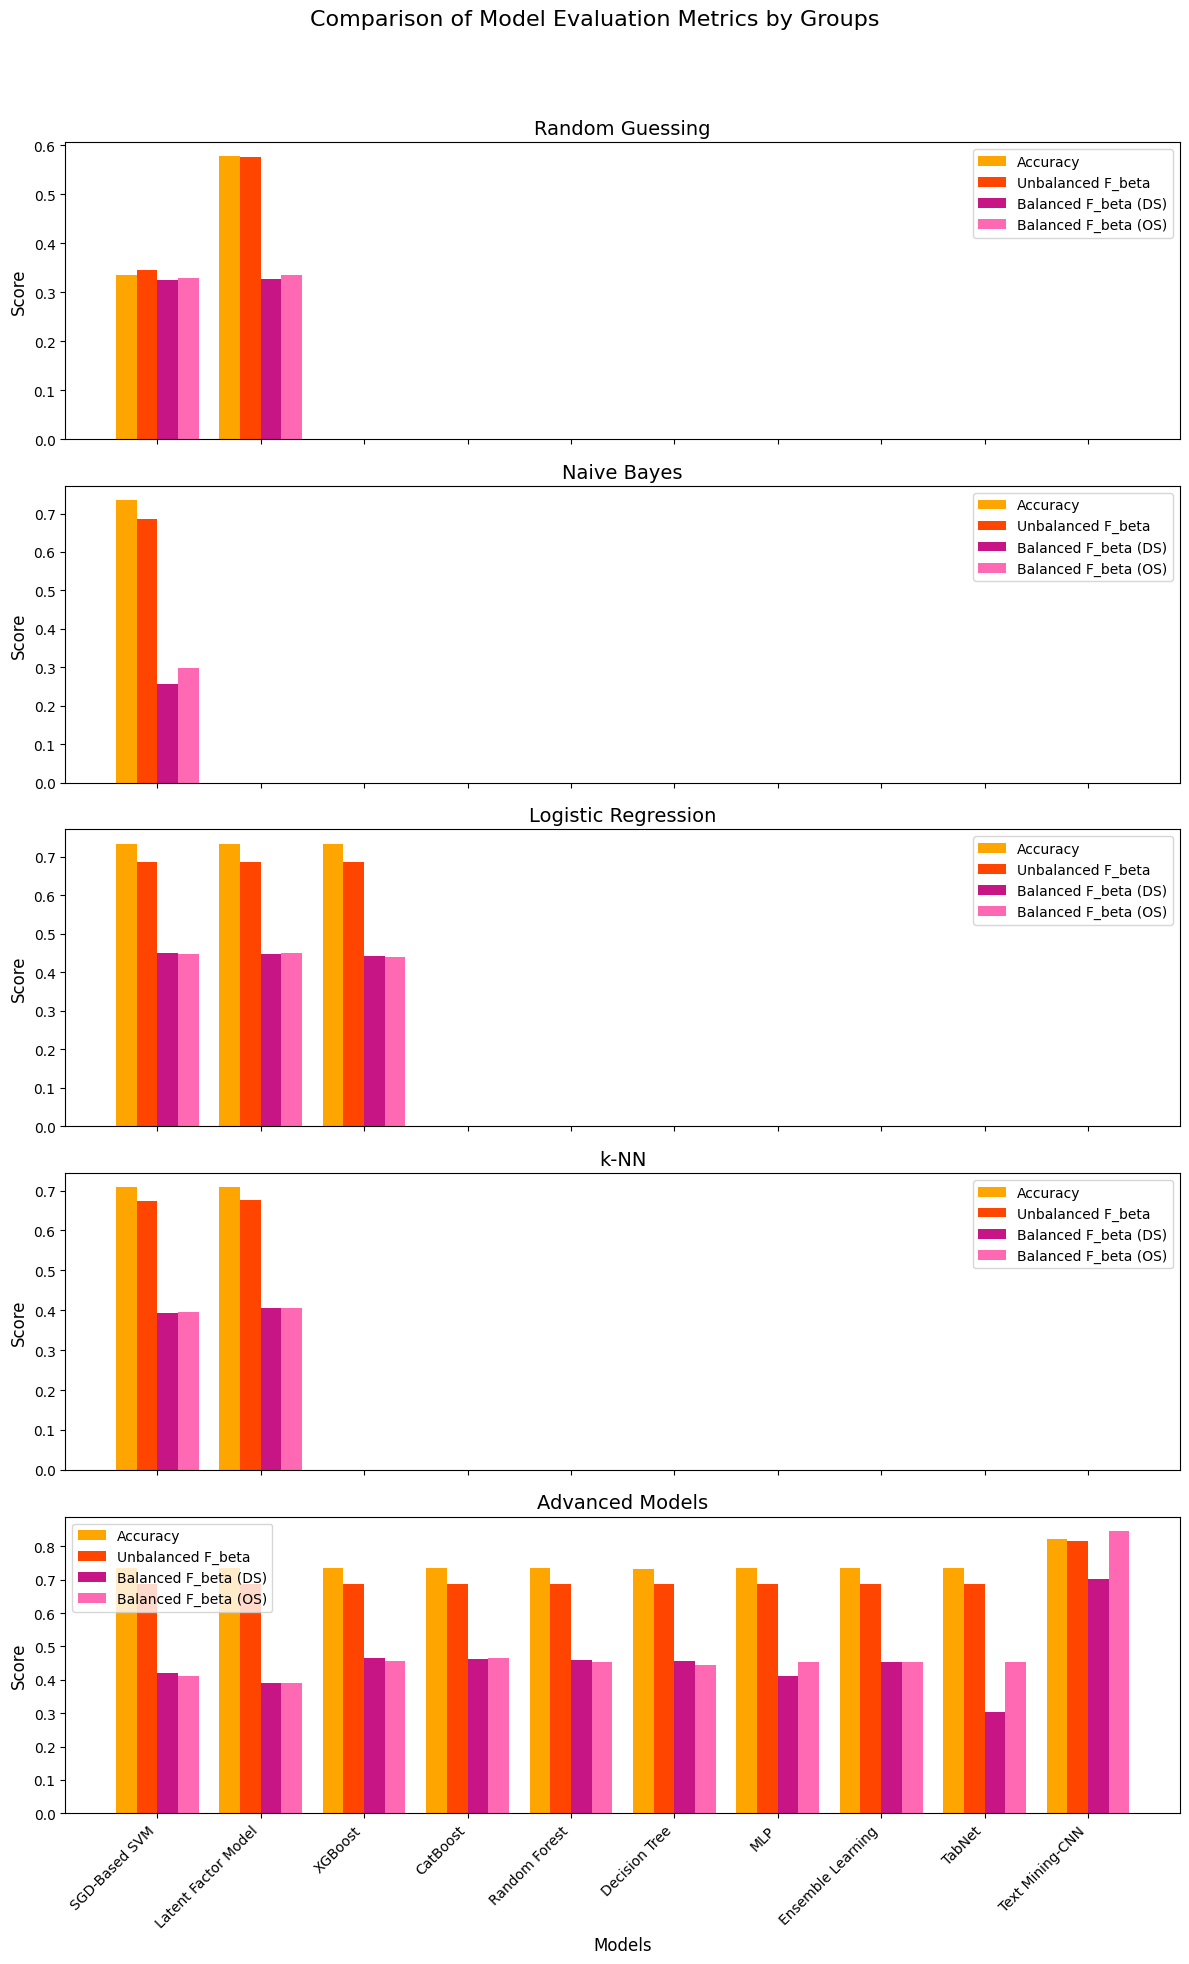

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define model groups for subplots
model_groups = {
    "Random Guessing": ["Uniform Random Guessing", "Weighted Random Guessing"],
    "Naive Bayes": ["Naive Bayes (Gaussian)"],
    "Logistic Regression": [
        "Logistic Regression (All Features)",
        "Logistic Regression (Top 5 Features)",
        "Logistic Regression (Body Features)"
    ],
    "k-NN": ["k-NN (All Features)", "k-NN (Body Features)"],
    "Advanced Models": [
        "SGD-Based SVM", "Latent Factor Model", "XGBoost", "CatBoost",
        "Random Forest", "Decision Tree", "MLP", "Ensemble Learning", "TabNet", "Text Mining-CNN"
    ]
}

# Prepare data subsets for each group
data_subsets = {group: df[df["Model"].isin(models)] for group, models in model_groups.items()}

# Define custom colors
colors = {
    "Accuracy": "#FFA500",  # Orange
    "Unbalanced F_beta": "#FF4500",  # Red-Orange
    "Balanced F_beta (DS)": "#C71585",  # Purple
    "Balanced F_beta (OS)": "#FF69B4"  # Pink
}

# Create subplots for each group
fig, axes = plt.subplots(len(data_subsets), 1, figsize=(12, len(data_subsets) * 4), sharex=True)
fig.subplots_adjust(hspace=0.5)

# Plot each group
for ax, (group, subset) in zip(axes, data_subsets.items()):
    x = np.arange(len(subset["Model"]))
    width = 0.2

    # Plot bars for each metric
    ax.bar(x - width * 1.5, subset["Accuracy"], width, label='Accuracy', color=colors["Accuracy"])
    ax.bar(x - width / 2, subset["Unbalanced F_beta"], width, label='Unbalanced F_beta', color=colors["Unbalanced F_beta"])
    ax.bar(x + width / 2, subset["Balanced F_beta (DS)"], width, label='Balanced F_beta (DS)', color=colors["Balanced F_beta (DS)"])
    ax.bar(x + width * 1.5, subset["Balanced F_beta (OS)"], width, label='Balanced F_beta (OS)', color=colors["Balanced F_beta (OS)"])

    # Set titles and labels
    ax.set_title(group, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(subset["Model"], rotation=45, ha="right", fontsize=10)
    ax.set_ylabel('Score', fontsize=12)
    ax.legend(fontsize=10)

# Finalize and show the plot
axes[-1].set_xlabel('Models', fontsize=12)
plt.suptitle('Comparison of Model Evaluation Metrics by Groups', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


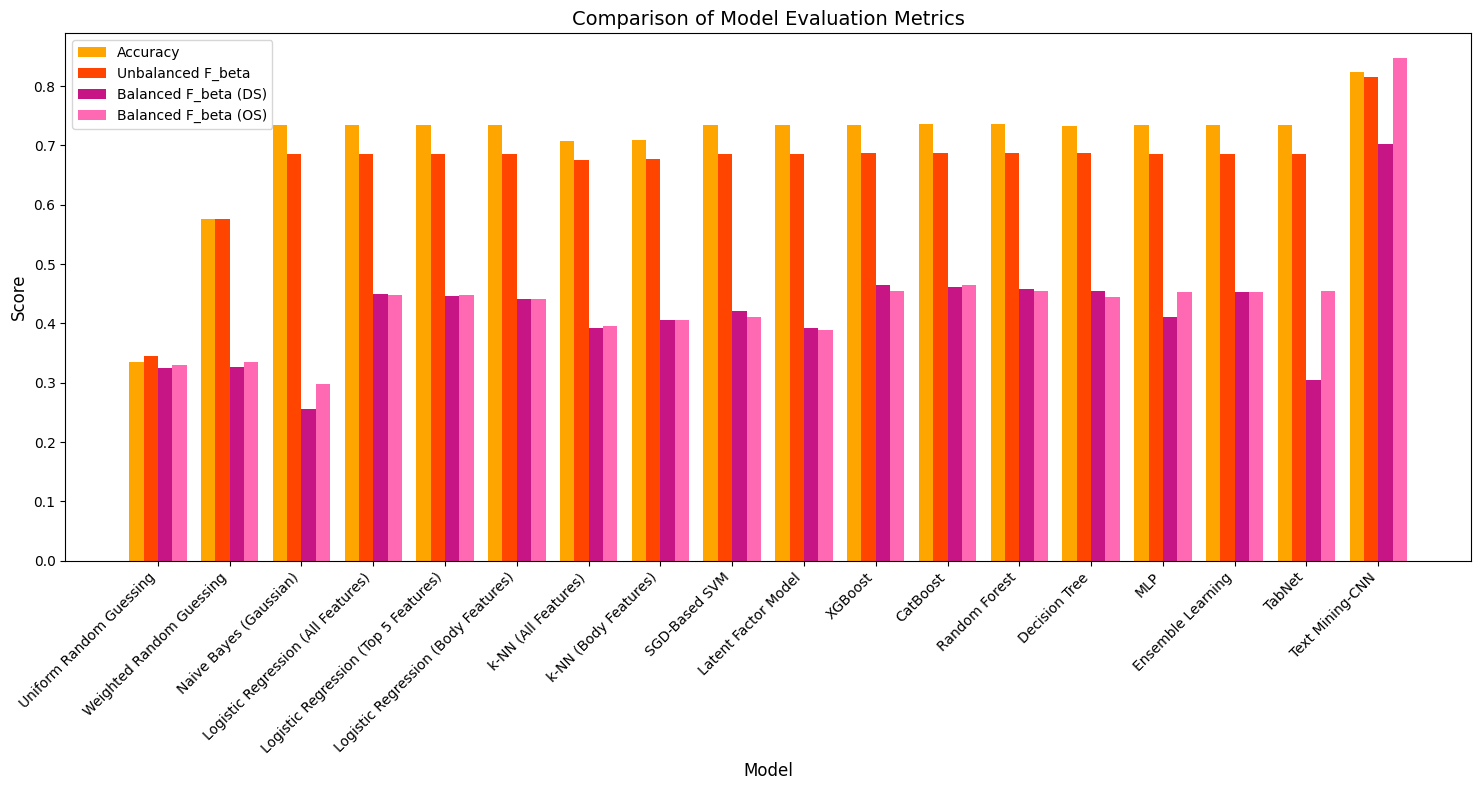

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from the table
data = {
    "Model": [
        "Uniform Random Guessing", "Weighted Random Guessing", "Naive Bayes (Gaussian)",
        "Logistic Regression (All Features)", "Logistic Regression (Top 5 Features)", 
        "Logistic Regression (Body Features)", "k-NN (All Features)", "k-NN (Body Features)",
        "SGD-Based SVM", "Latent Factor Model", "XGBoost", "CatBoost", "Random Forest", 
        "Decision Tree", "MLP", "Ensemble Learning", "TabNet", "Text Mining-CNN"
    ],
    "Accuracy": [
        0.3346, 0.5767, 0.7351, 0.7339, 0.7340, 0.7339, 0.7081, 0.7086, 0.7351, 0.7350, 0.7353,
        0.7356, 0.7360, 0.7332, 0.7352, 0.7343, 0.7351, 0.8232
    ],
    "Unbalanced F_beta": [
        0.3447, 0.5765, 0.6857, 0.6853, 0.6854, 0.6854, 0.6749, 0.6771, 0.6857, 0.6856, 0.6865,
        0.6872, 0.6873, 0.6877, 0.6859, 0.6858, 0.6857, 0.8151
    ],
    "Balanced F_beta (DS)": [
        0.3254, 0.3269, 0.2564, 0.4503, 0.4470, 0.4420, 0.3925, 0.4064, 0.4202, 0.3916, 0.4647,
        0.4620, 0.4585, 0.4549, 0.4108, 0.4527, 0.3050, 0.7030
    ],
    "Balanced F_beta (OS)": [
        0.3293, 0.3350, 0.2980, 0.4485, 0.4486, 0.4406, 0.3962, 0.4066, 0.4116, 0.3892, 0.4554,
        0.4644, 0.4546, 0.4453, 0.4531, 0.4524, 0.4539, 0.8467
    ]
}

# Define custom colors
colors = {
    "Accuracy": "#FFA500",  # Orange
    "Unbalanced F_beta": "#FF4500",  # Red-Orange
    "Balanced F_beta (DS)": "#C71585",  # Purple
    "Balanced F_beta (OS)": "#FF69B4"  # Pink
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create a plot for comparative metrics
fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(df["Model"]))  # the label locations
width = 0.2  # the width of the bars

# Plot each metric as bars
ax.bar(x - width * 1.5, df["Accuracy"], width, label='Accuracy', color=colors["Accuracy"])
ax.bar(x - width / 2, df["Unbalanced F_beta"], width, label='Unbalanced F_beta', color=colors["Unbalanced F_beta"])
ax.bar(x + width / 2, df["Balanced F_beta (DS)"], width, label='Balanced F_beta (DS)', color=colors["Balanced F_beta (DS)"])
ax.bar(x + width * 1.5, df["Balanced F_beta (OS)"], width, label='Balanced F_beta (OS)', color=colors["Balanced F_beta (OS)"])

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparison of Model Evaluation Metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha="right", fontsize=10)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


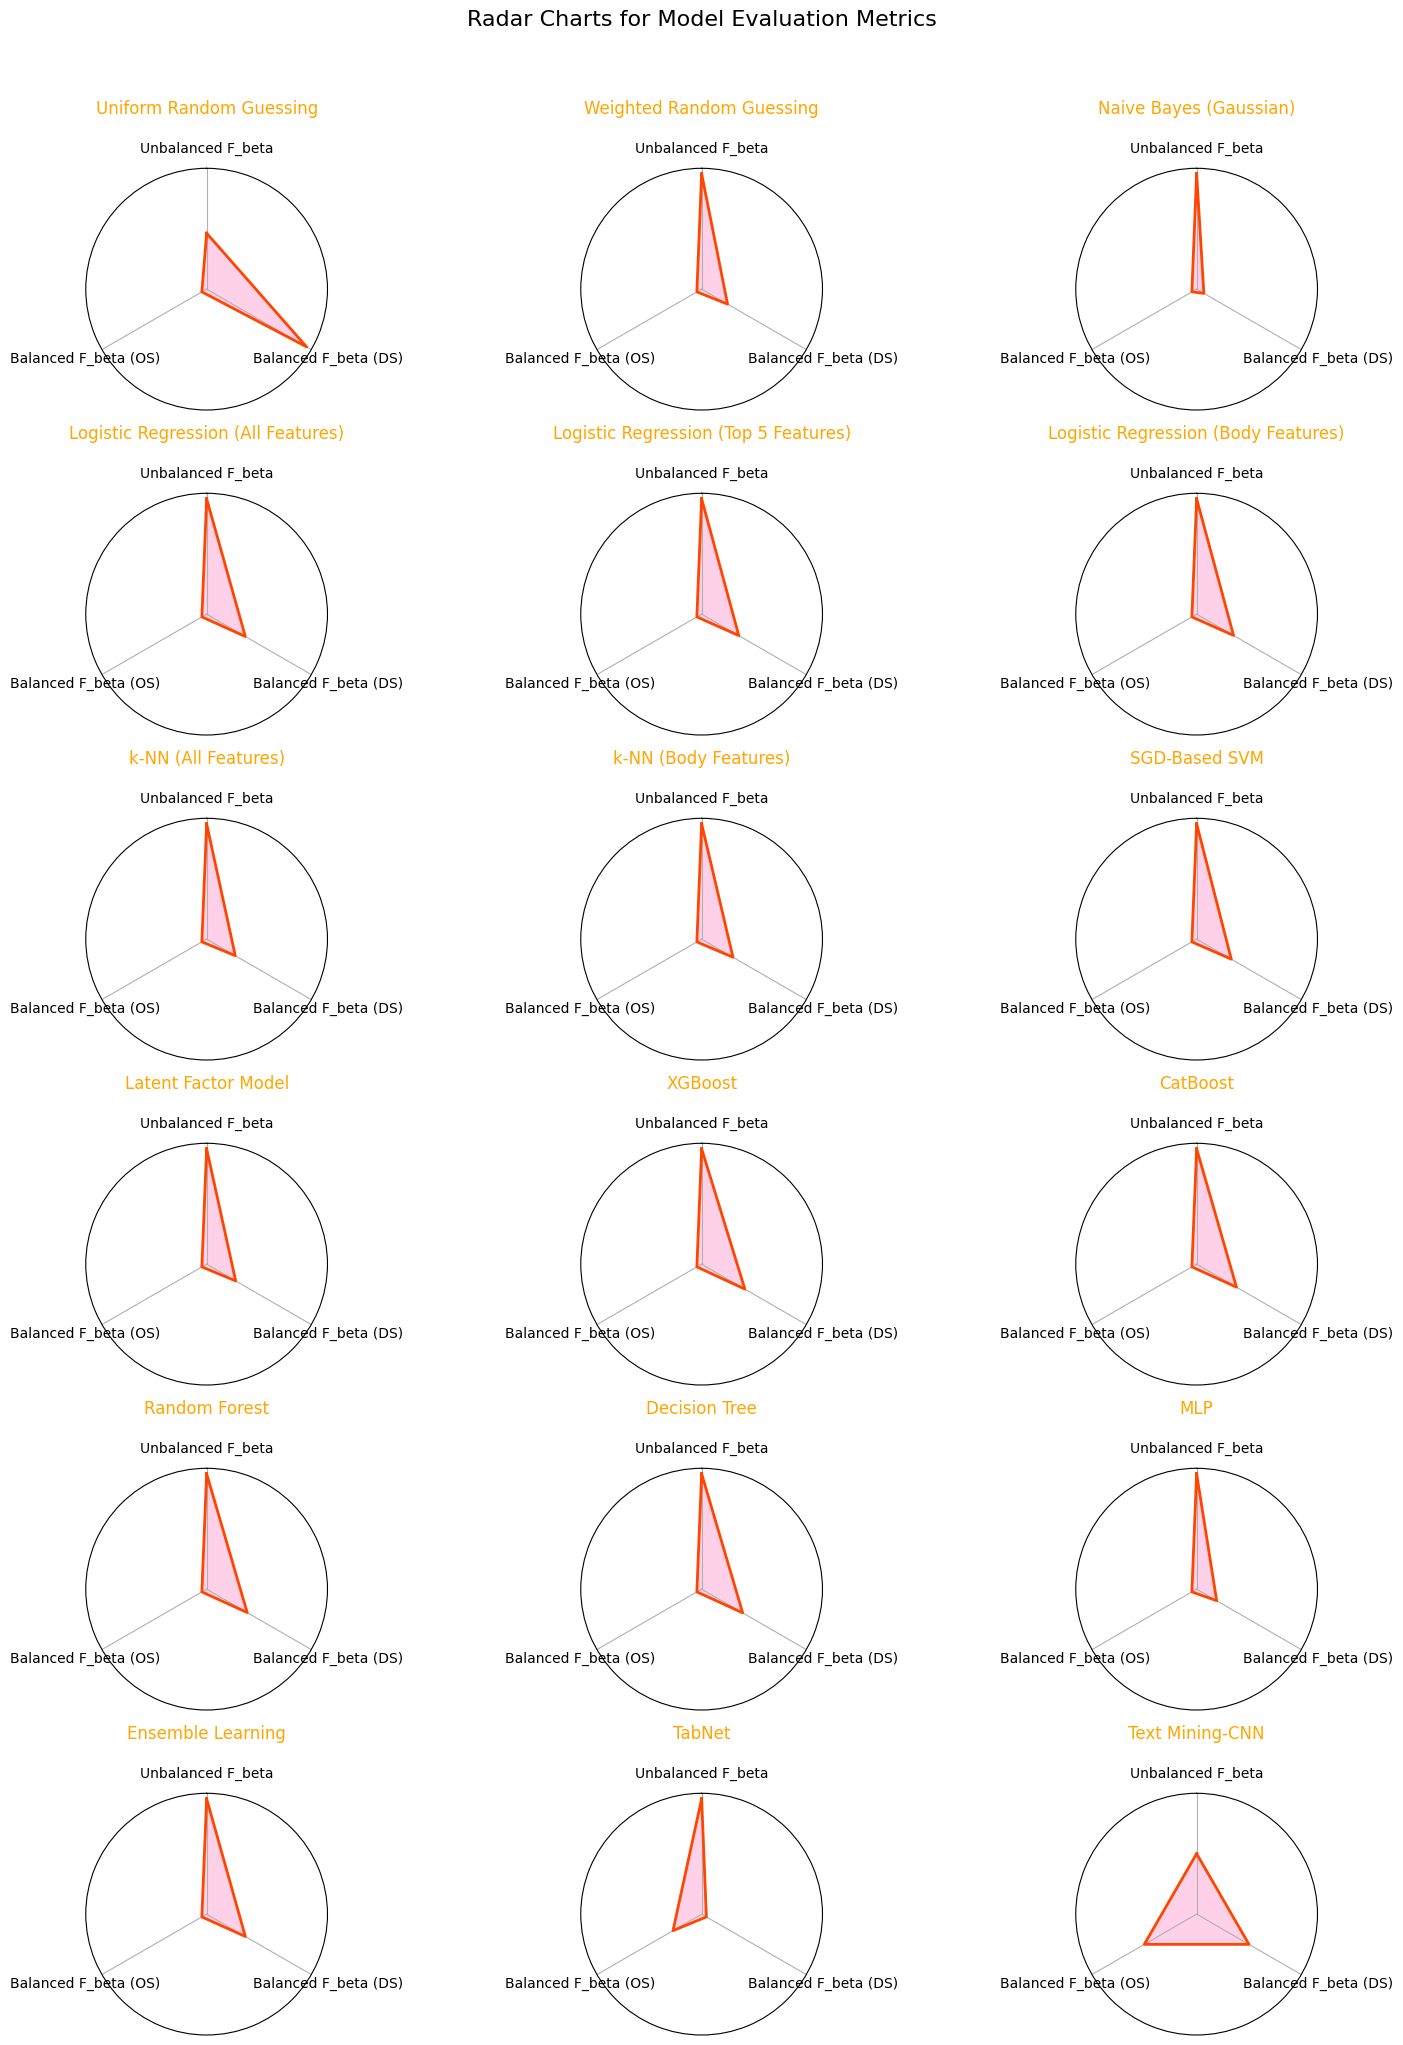

In [7]:
from math import pi
import matplotlib.pyplot as plt

# Prepare data for the radar chart
radar_data = df.set_index("Model").iloc[:, 1:]  # Exclude "Model" column
categories = radar_data.columns
models = radar_data.index

# Normalize the data (optional, for better visualization)
radar_data_normalized = radar_data / radar_data.max()

# Define custom colors
colors = {
    "Accuracy": "#FFA500",  # Orange
    "Unbalanced F_beta": "#FF4500",  # Red-Orange
    "Balanced F_beta (DS)": "#C71585",  # Medium Violet Red
    "Balanced F_beta (OS)": "#FF69B4"  # Pink
}

# Function to plot a radar chart for a single model
def plot_radar(model_name, data, categories, ax, colors):
    values = data.loc[model_name].tolist()
    values += values[:1]  # Close the loop
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_yticks([])
    ax.set_title(model_name, fontsize=12, color=colors["Accuracy"], pad=20)

    # Plot data and fill area
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors["Unbalanced F_beta"])
    ax.fill(angles, values, color=colors["Balanced F_beta (OS)"], alpha=0.3)

# Plot radar charts for each model
fig, axes = plt.subplots(6, 3, figsize=(15, 20), subplot_kw={"polar": True})
axes = axes.flatten()

for i, model in enumerate(models):
    plot_radar(model, radar_data_normalized, categories, axes[i], colors)

# Remove empty subplots
for ax in axes[len(models):]:
    fig.delaxes(ax)

plt.suptitle("Radar Charts for Model Evaluation Metrics", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


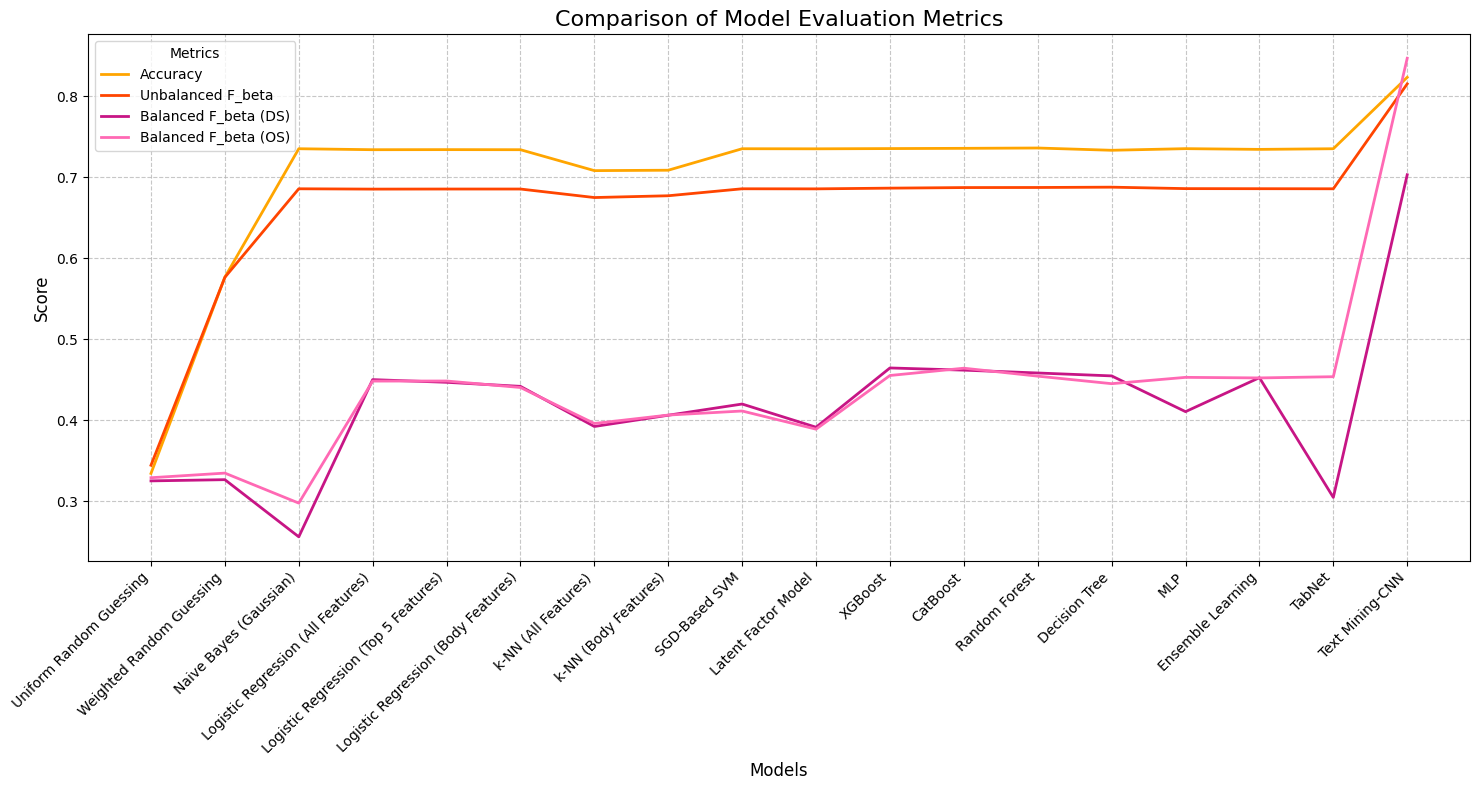

In [9]:
# Create a line chart with the specified color scheme

# Define custom colors for the metrics
colors = {
    "Accuracy": "#FFA500",  # Orange
    "Unbalanced F_beta": "#FF4500",  # Red-Orange
    "Balanced F_beta (DS)": "#C71585",  # Medium Violet Red
    "Balanced F_beta (OS)": "#FF69B4"  # Pink
}

# Prepare the data
metrics = ["Accuracy", "Unbalanced F_beta", "Balanced F_beta (DS)", "Balanced F_beta (OS)"]
x = np.arange(len(df["Model"]))

# Plot line chart
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each metric as a separate line with the custom colors
for metric, color in colors.items():
    ax.plot(x, df[metric], label=metric, color=color, linewidth=2)

# Add titles, labels, and legend
ax.set_title("Comparison of Model Evaluation Metrics", fontsize=16)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=45, ha="right", fontsize=10)
ax.legend(title="Metrics", fontsize=10)

# Add grid for better readability
ax.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
